# Homework Assignment 1

In [1]:
# Import Packages
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Baysian Bandit Analysis
We set up the rule of the game and the algorithm to selectio the "best" game to play maximize our "profit" after we done playing the game. <br>

### Configuration
Specifically, we define <br>
1. $\theta_1=0.2, \theta_2=0.8, \theta_3=0.5$ be three parameters follows $Beta(\alpha_1,\beta_1), Beta(\alpha_2,\beta_2), Beta(\alpha_3,\beta_3)$ respectively.
2. Let $(\alpha_1,\beta_1) = (0.5,0.5), (\alpha_2,\beta_2) = (2,5), (\alpha_1,\beta_1) = (1,3)$ 
3. $C_1$ = coin 1 with Pr(head) = $\theta_1$, $C_2$= coin 2 with Pr(head) = $\theta_2$, $C_3$ = coin with Pr(head) = $\theta_3$


### Qualitative Analysis of the Gaming process
Using the configuration above, we are given 3 coins with distinct probabilities of getting head. For the sake of simplicity, let's assume our initial wealth is 0. At each round, we are asked to choose one of three coins and flip it. If we get an head, our wealth incrementes by 1. Otherwise, our wealth remains the same. Our goal is to try to maximize our total wealth after $m$ rounds.<br>
Intuitatively, if we can choose the coin with the highest $Pr(head)$, then we have higher chance to increase our total wealth. However, in practice, we do not know the $Pr(head)$ for $C_1,C_2,C_3$. Therefore, infer which one has the highest $Pr(head)$ based on our history of playing this game and hope for the best that we pick the right one and win 1 million dollars afte 1 million flips (if we are allowed to play that long period of times)

### Quantitative Selection Criterion
To formalize the arguement above mathematically, let $i \in \{1,2,3\}$, defining the following quantities.
- $X^i \in \{0,1\}:$ a randome variable represents of the outcome of flipping $C_i$
- $X^i \sim Bernoulli(\theta_i)$
- $W(i) = E(X^1):$ Expected wealth of flipping $C_i$
Recall that $\theta_i \sim Beta(\alpha_i,\beta_i)$ is a conjugate prior, after each coin flip of $C_i$, the posterior distribution of $\theta_i$ are<br>
- $Pr(\theta_i|X^i=1) \propto \theta_i^{\alpha_i+1-1}(1-\theta_i)^{\beta_i-1} \sim Beta(\alpha_i+1,\beta_i)$
- $Pr(\theta_i|X^i=0) \propto \theta_i^{\alpha_i-1}(1-\theta_i)^{\beta_i+1-1} \sim Beta(\alpha_i,\beta_i+1)$<br>
This implies <br>
<center>
    $E[W(i)|X^i] = E(\theta_i|X^i)$
</center>
is maximized if and only if $E(\theta_i|X^i)$ is maximized. Namely, we choose the coin (say $C_{max})$ with the highest posterior mean to flip. This criterion asserts our intuitation developed from the qualitative analysis by maximizing our expected wealth at each round of the game based on the our past "performance" of the game.<br>
It is left to estimate $E(\theta_i|X^i)$. In this typical Bernoulli style game with beta prior, we know $\theta_i|X^i$ follows a beta distribution with some updated parameters. So, we have a closed form formula to evaluate $E(\theta_i|X^i)$. In general, one can sampling(simulating) some observations of $\theta_i|X^i$ from the posetrior distributions and compare the sample average. Or one may compute the median of the posterior. I choose the closed form solution here since this will gives us $\mathcal{O}(1)$ worst-case running time. And it will make the worst-case running time of the entir algorithm $\mathcal{O}(\log n)$, where $n$ is the number of time we played the game.

### Algorithm
Here is the pseudo code 

***Baysian_Bandit(n)***<br>
> W $\leftarrow$ 0 <br /> 
> For k = 1 to n <br />
> > Compute $E(\theta_i) \sim Beta(\alpha_i, \beta_i)$ for all $i \in \{1,2,3\}$ <br>
> > $\hat{i} \leftarrow argMAX_{i \in \{1,2,3\}}E(\theta_i)$ <br>
> > flip coin $C_{\hat{i}}$ and get reward $r$ <br>
> > W $\leftarrow$ W + r <br>
> > Update $p(\theta_{\hat i})$ to $p(\theta_{\hat i}|r)$ <br />

> End for 

> return W

The following is a python code implementation of the algorithm. 

## Python Implementation

In [2]:
## Helper function
def populate_betaDist(alpha_vec, beta_vec):
    beta_dist = []
    for i in range(len(alpha_vec)):
        curr_beta_dist = stats.beta(a=alpha_vec[i],b=beta_vec[i])
        beta_dist.append(curr_beta_dist)
    return beta_dist

def get_max_beta_mean_idx(beta_dists):
    idx = 0
    max_mean = 0
    for i in range(len(beta_dists)):
        curr_beta = beta_dists[i]
        curr_mean = curr_beta.mean()
        if curr_mean >= max_mean:
            idx = i
            max_men = curr_mean
    return idx

In [3]:
## Setting up Intial Values for Parameters
theta = [0.2,0.8,0.5]
alpha = [0.5, 2, 1]
beta = [0.5, 5, 3]
n = 1000

## Plot of Prior

Text(0.5, 1.0, 'Posterior Plot')

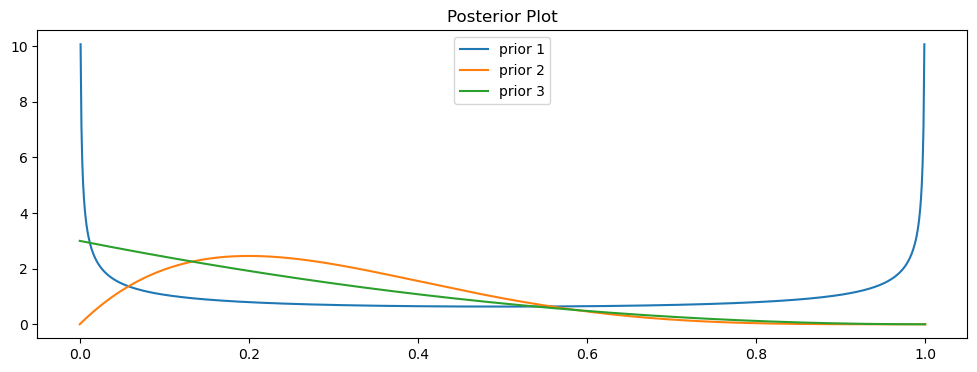

In [4]:
parameter_domain = np.linspace(0,1,1001)
beta_prior_1 = stats.beta(a=alpha[0],b=beta[0]).pdf(parameter_domain)
beta_prior_2 = stats.beta(a=alpha[1],b=beta[1]).pdf(parameter_domain)
beta_prior_3 = stats.beta(a=alpha[2],b=beta[2]).pdf(parameter_domain)
#beta_prior_1 = beta_dists[0].pdf(parameter_domain)
#beta_prior_2 = beta_dists[1].pdf(parameter_domain)
#beta_prior_3 = beta_dists[2].pdf(parameter_domain)
plt.figure(figsize=(12,4))
plt.plot(parameter_domain, beta_prior_1, label="prior 1")
plt.plot(parameter_domain, beta_prior_2, label="prior 2")
plt.plot(parameter_domain, beta_prior_3, label="prior 3")
plt.legend();
plt.title("Posterior Plot")

In [10]:
def baysian_Bandit(n):
    alpha_vec = [0.5, 2, 1]
    beta_vec = [0.5, 5, 3]
    beta_dists = populate_betaDist(alpha, beta) 
    W = 0
    for i in range(n):
        # Selecting the optimal coin
        idx = get_max_beta_mean_idx(beta_dists)
        theta_hat = theta[idx] 
        
        # Flip the coin and update the wealth
        r = np.random.binomial(1, theta_hat) 
        W = W + r
        
        # Update the corresponding posterior
        if r == 1:
            alpha_vec[idx] = alpha_vec[idx] + 1
        else:
            beta_vec[idx] = beta_vec[idx] + 1
        beta_dists[idx] = stats.beta(alpha_vec[idx],beta_vec[idx])
    return W, beta_dists
game_output = baysian_Bandit(1000)
total_wealth = game_output[0]
beta_dists = game_output[1]
total_wealth

507

## Plot of the Posterior Distribution of n=1000

Text(0.5, 1.0, 'Posterior Plot')

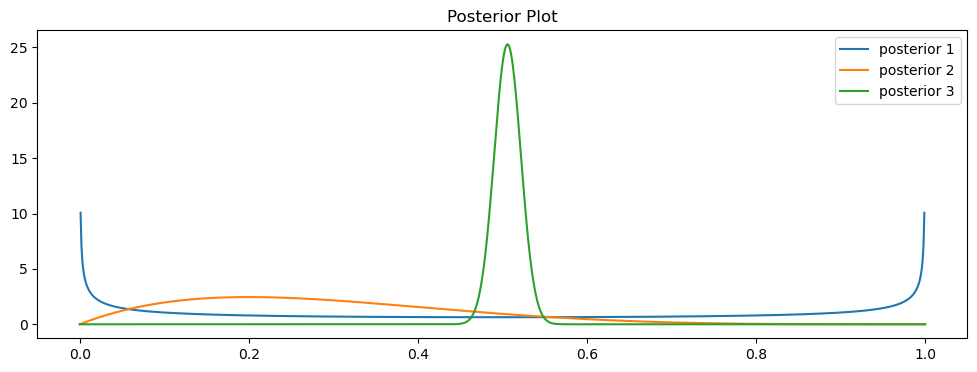

In [11]:
parameter_domain = np.linspace(0,1,1001)
beta_posterior_1 = beta_dists[0].pdf(parameter_domain)
beta_posterior_2 = beta_dists[1].pdf(parameter_domain)
beta_posterior_3 = beta_dists[2].pdf(parameter_domain)
plt.figure(figsize=(12,4))
plt.plot(parameter_domain, beta_posterior_1, label="posterior 1")
plt.plot(parameter_domain, beta_posterior_2, label="posterior 2")
plt.plot(parameter_domain, beta_posterior_3, label="posterior 3")
plt.legend();
plt.title("Posterior Plot")

## Plot of Posterior of n = 5000

Text(0.5, 1.0, 'Posterior Plot')

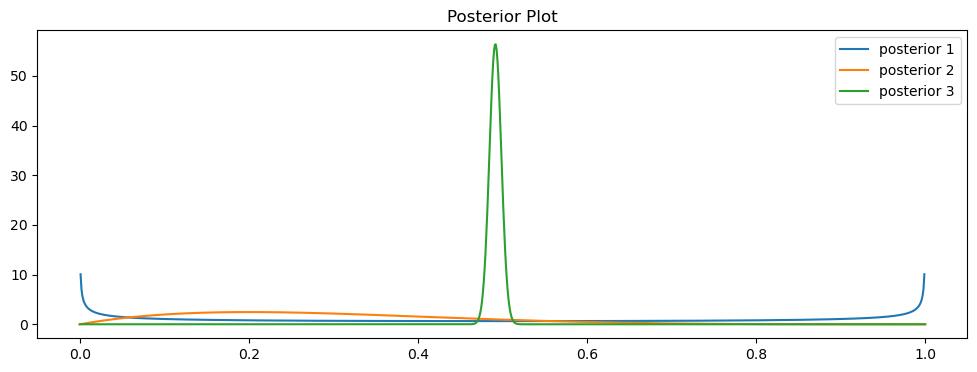

In [12]:
game_output2 = baysian_Bandit(5000)
total_wealth_2 = game_output2[0]
beta_dists_2 = game_output2[1]
total_wealth_2
new_beta_posterior_1 = beta_dists_2[0].pdf(parameter_domain)
new_beta_posterior_2 = beta_dists_2[1].pdf(parameter_domain)
new_beta_posterior_3 = beta_dists_2[2].pdf(parameter_domain)
plt.figure(figsize=(12,4))
plt.plot(parameter_domain, new_beta_posterior_1, label="posterior 1")
plt.plot(parameter_domain, new_beta_posterior_2, label="posterior 2")
plt.plot(parameter_domain, new_beta_posterior_3, label="posterior 3")
plt.legend();
plt.title("Posterior Plot")

## Final Conclusion
We can see that when $n \to \infty$, i.e. getting larger and larger, the posterior of $Pr(head)$ of the optimal coin getting more and more concerntrated. This makes sense since we keep playing the optimal coin and the posterior is dominated by the data instead of the initial parameter. 